by: **Aisha Toichieva**

# Independent Work 1:

### Part 1:

**Implement Maclaurin Polynomial.**

`Input: f(x), n. Output: P_n(x)`







In [4]:
import math
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t, a = sp.symbols('t a')


def maclurin_terms(func, order, point=0, derivatives=None):

    # initialize list of derivatives
    if derivatives is None:
        derivatives = [func.subs({t: a})]

    # check if highest order derivative is reached
    if len(derivatives) > order:
        # return list of taylor terms evaluated using substitution
        return derivatives, [derivatives[i].subs({a: point}) / math.factorial(i) * (t - point) ** i for i in range(len(derivatives))]

    # differentiate function with respect to t
    derivative = func.diff(t)

    # append to list of symbolic derivatives ** substitute t with a **
    derivatives.append(derivative.subs({t: a}))

    # recursive call to find next term in Taylor polynomial
    return maclurin_terms(derivative, order, point, derivatives)


def maclurin_polynomials(_terms):
    # initialize list
    polynomials = []

    # initialize taylor polynomial
    _poly = None

    # loop through tayloer terms
    for term in range(len(_terms)):
        # build up polynomial on each iteration
        _poly = _terms[term] if _poly is None else _poly + _terms[term]

        # store current taylor polynomial
        polynomials.append(_poly)

    # return m polynomials
    return polynomials



**Bonus: Comparing the graphs of f(x) and P_n(x) for Maclurin Polynomials**

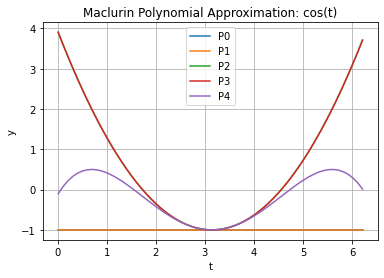

,symbolic_derivatives,maclurin_terms,polynomials
0,cos(a),-1.00000000000000,-1.00000000000000
1,-sin(a),3.84734138744358e-16 - 1.22464679914735e-16*t,-1.22464679914735e-16*t - 1.0
2,-cos(a),4.93480220054468*(0.318309886183791*t - 1)**2,-1.22464679914735e-16*t + 4.93480220054468*(0....
3,sin(a),6.32862291500106e-16*(0.318309886183791*t - 1)**3,-1.22464679914735e-16*t + 6.32862291500106e-16...
4,cos(a),-4.05871212641677*(0.318309886183791*t - 1)**4,-1.22464679914735e-16*t - 4.05871212641677*(0....


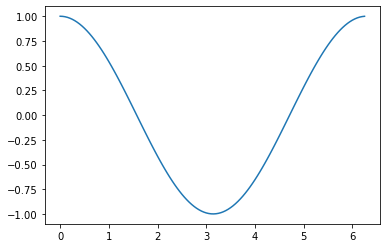

In [71]:
# Graph for P_n(X)

label = 'cos(t)'
# find m polynomial terms describing function f(t)
symbolic_derivatives, terms = maclurin_terms(func=sp.cos(t), order=4, point=math.pi)
polys = maclurin_polynomials(terms)

fig, ax = plt.subplots()
ax.set(xlabel='t', ylabel='y', title=f'Maclurin Polynomial Approximation: {label}')
legend = []

for p, poly in enumerate(polys):
    # plot current polynomial approximation
    ax.plot(time, [poly.subs({t: point}) for point in time])

    # append item to legend
    legend.append(f'P{p}')


# save and show results
ax.legend(legend)
ax.grid()
plt.show()


# Graph for f_x
x_values = np.arange(0, math.pi*2, 0.05)
# print(x_values)
f_x=[]
for i in range(len(x_values)):
    f_x.append(math.cos(x_values[i]))
#     f_x[i+1]=math.cos(x_values[i])
plt.plot(x_values,f_x)


# checking the resulting values in dataframe
df = pd.DataFrame({'symbolic_derivatives': symbolic_derivatives,
                       'maclurin_terms': terms,
                       'polynomials': polys
                       })
df.head()

**Implement Taylor Polynomial.** 

`Input: f(x), c, n. Output: P_n(x)`
        

In [66]:
import math
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t, a = sp.symbols('t a')


def taylor_terms(func, order, point, derivatives=None):

    # initialize list of derivatives
    if derivatives is None:
        derivatives = [func.subs({t: a})]

    # check if highest order derivative is reached
    if len(derivatives) > order:
        # return list of taylor terms evaluated using substitution
        return derivatives,[derivatives[i].subs({a: point}) / math.factorial(i) * (t - point) ** i for i in range(len(derivatives))]

    # differentiate function with respect to t
    derivative = func.diff(t)

    # append to list of symbolic derivatives ** substitute t with a **
    derivatives.append(derivative.subs({t: a}))

    # recursive call to find next term in Taylor polynomial
    return taylor_terms(derivative, order, point, derivatives)


def taylor_polynomials(_terms):
    # initialize list
    polynomials = []

    # initialize taylor polynomial
    _poly = None

    # loop through tayloer terms
    for term in range(len(_terms)):
        # build up polynomial on each iteration
        _poly = _terms[term] if _poly is None else _poly + _terms[term]

        # store current taylor polynomial
        polynomials.append(_poly)

    # return taylor polynomials
    return polynomials




**Bonus: Comparing the graphs of f(x) and P_n(x)**

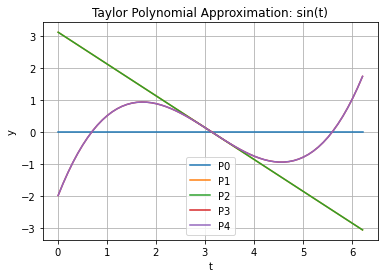

,symbolic_derivatives,taylor_terms,polynomials
0,sin(a),1.22464679914735e-16,1.22464679914735e-16
1,cos(a),3.14159265358979 - 1.0*t,3.14159265358979 - 1.0*t
2,-sin(a),-6.04338971932236e-16*(0.318309886183791*t - 1...,-1.0*t - 6.04338971932236e-16*(0.3183098861837...
3,-cos(a),5.16771278004997*(0.318309886183791*t - 1)**3,-1.0*t + 5.16771278004997*(0.318309886183791*t...
4,sin(a),4.97048881427684e-16*(0.318309886183791*t - 1)**4,-1.0*t + 4.97048881427684e-16*(0.3183098861837...


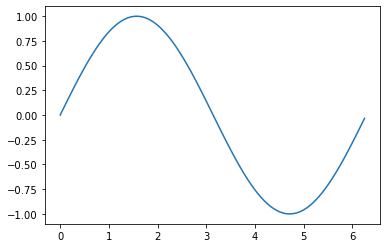

In [68]:

label = 'sin(t)'
# find taylor polynomial terms describing function f(t)
symbolic_derivatives, terms = taylor_terms(func=sp.sin(t), order=4, point=math.pi)
polys = taylor_polynomials(terms)

fig, ax = plt.subplots()
ax.set(xlabel='t', ylabel='y', title=f'Taylor Polynomial Approximation: {label}')
legend = []

for p, poly in enumerate(polys):
    # plot current polynomial approximation
    ax.plot(time, [poly.subs({t: point}) for point in time])

    # append item to legend
    legend.append(f'P{p}')


ax.legend(legend)
ax.grid()
plt.show()


x_values = np.arange(0, math.pi*2, 0.05)
# print(x_values)
f_x=[]
for i in range(len(x_values)):
    f_x.append(math.sin(x_values[i]))
#     f_x[i+1]=math.cos(x_values[i])
plt.plot(x_values,f_x)


df = pd.DataFrame({'symbolic_derivatives': symbolic_derivatives,
                       'taylor_terms': terms,
                       'polynomials': polys
                       })
df.head()

## Reference for Part - I

> ***I found a great tutorial*** [here](https://python.plainenglish.io/how-to-approximate-a-function-using-taylor-polynomials-in-python-d43e55fd90b5)

# Part 2:


### Approximate Pi using arctan1

In [169]:
import gmpy2
import sys
from gmpy2 import mpfr, sqrt, atan, ceil, factorial
from itertools import product

gmpy2.get_context().precision = 339

In [192]:
def Arctangent(n):
    term = lambda x: mpfr((2 ** (x + 1) * factorial(x) ** 2) / factorial(2 * x + 1))
    return '{0:.150f}'.format(mpfr(sum(term(i) for i in range(n))))


In [193]:
pi_A=Arctangent(13)

In [194]:
type(pi_A)

str

In [195]:
pi_Alist=list(pi_A)
print(pi_Alist)

['3', '.', '1', '4', '1', '4', '7', '9', '6', '4', '8', '9', '6', '1', '1', '4', '0', '4', '1', '3', '5', '5', '6', '6', '2', '0', '3', '1', '3', '9', '2', '2', '7', '7', '7', '2', '4', '2', '2', '0', '1', '1', '2', '1', '5', '9', '2', '6', '9', '5', '1', '5', '5', '7', '5', '8', '8', '2', '5', '1', '6', '2', '5', '1', '3', '4', '1', '1', '2', '6', '8', '2', '9', '0', '7', '9', '4', '4', '7', '1', '9', '7', '6', '3', '2', '6', '8', '6', '9', '3', '1', '3', '8', '1', '2', '3', '7', '4', '7', '8', '9', '6', '2', '3', '4', '1', '6', '3', '8', '5', '6', '7', '9', '6', '9', '2', '9', '2', '0', '2', '2', '0', '6', '0', '8', '2', '9', '7', '6', '8', '6', '8', '8', '0', '7', '4', '1', '6', '6', '7', '3', '2', '2', '2', '0', '0', '2', '5', '5', '9', '4', '3']


### Approximate Pi using Ramanujan's Series 

In [188]:
def Ramanujan(n):
    term = lambda k: mpfr(factorial(4 * k) * (1103 + 26390 * k)) / (factorial(k) ** 4 * 396 ** (4 * k))
    s = sum(term(i) for i in range(n))
    return '{0:.150f}'.format(mpfr(1) / (2 * sqrt(2) * s / 9801))

In [189]:
pi_R=Ramanujan(13)

In [190]:
type(pi_R)

str

In [191]:
pi_Rlist = list(pi_R)
print(pi_Rlist)

['3', '.', '1', '4', '1', '5', '9', '2', '6', '5', '3', '5', '8', '9', '7', '9', '3', '2', '3', '8', '4', '6', '2', '6', '4', '3', '3', '8', '3', '2', '7', '9', '5', '0', '2', '8', '8', '4', '1', '9', '7', '1', '6', '9', '3', '9', '9', '3', '7', '5', '1', '0', '5', '8', '2', '0', '9', '7', '4', '9', '4', '4', '5', '9', '2', '3', '0', '7', '8', '1', '6', '4', '0', '6', '2', '8', '6', '2', '0', '8', '9', '9', '8', '6', '2', '8', '0', '3', '4', '8', '2', '5', '3', '4', '2', '1', '1', '7', '0', '6', '7', '9', '7', '9', '2', '7', '9', '1', '9', '3', '7', '1', '1', '5', '2', '2', '6', '6', '9', '2', '0', '8', '5', '9', '4', '9', '4', '6', '5', '4', '9', '0', '5', '4', '8', '7', '0', '9', '8', '3', '9', '0', '6', '0', '2', '0', '9', '2', '3', '1', '6', '0']


### Reference:
[here](https://codereview.stackexchange.com/questions/262671/python-3-approximate-pi-using-9-algorithms)

## Comparing the two algorithms

In [178]:
%timeit Ramanujan(13)


60 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [179]:
%timeit Arctangent(13)

43.4 µs ± 3.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In terms of time for execution as we can see, Ramanujan method took 60 micro second which is much greater as compare to the 43.4 micro seconds for Arctangent.
> Result: **Therefore, the best is of two is Arctanget.**

In [181]:
0.0000060 > 0.00000433

True

In term of excatness to the pi, we can compare how long the digits of the pi from both methods match the standard calculated pi [here](http://www.geom.uiuc.edu/~huberty/math5337/groupe/digits.html).


In [196]:
len(pi_Alist)

152

In [197]:
len(pi_Rlist)

152

In [198]:
pii_to_compare=list('3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233')
print(pii_to_compare)

['3', '.', '1', '4', '1', '5', '9', '2', '6', '5', '3', '5', '8', '9', '7', '9', '3', '2', '3', '8', '4', '6', '2', '6', '4', '3', '3', '8', '3', '2', '7', '9', '5', '0', '2', '8', '8', '4', '1', '9', '7', '1', '6', '9', '3', '9', '9', '3', '7', '5', '1', '0', '5', '8', '2', '0', '9', '7', '4', '9', '4', '4', '5', '9', '2', '3', '0', '7', '8', '1', '6', '4', '0', '6', '2', '8', '6', '2', '0', '8', '9', '9', '8', '6', '2', '8', '0', '3', '4', '8', '2', '5', '3', '4', '2', '1', '1', '7', '0', '6', '7', '9', '8', '2', '1', '4', '8', '0', '8', '6', '5', '1', '3', '2', '8', '2', '3', '0', '6', '6', '4', '7', '0', '9', '3', '8', '4', '4', '6', '0', '9', '5', '5', '0', '5', '8', '2', '2', '3', '1', '7', '2', '5', '3', '5', '9', '4', '0', '8', '1', '2', '8', '4', '8', '1', '1', '1', '7', '4', '5', '0', '2', '8', '4', '1', '0', '2', '7', '0', '1', '9', '3', '8', '5', '2', '1', '1', '0', '5', '5', '5', '9', '6', '4', '4', '6', '2', '2', '9', '4', '8', '9', '5', '4', '9', '3', '0', '3', '8', '1',

In [202]:
# comparing the pis to see which algo. gave more decimal point accracy

decimal_point_forA=0
decimal_point_forR=0

for i in range(len(pi_Alist)):
    if pi_Alist[i]!=pii_to_compare[i]:
        decimal_point_forA=i
    if pi_Rlist[i] != pii_to_compare[i]:
        decimal_point_forR=i

if decimal_point_forA==decimal_point_forR:
    print("both have/gave same accurate value of pi till the decimal point ", decimal_point_forA)
#     print(f"The decimal point accuracy for A={decimal_point_forA}\nThe decimal point accuracy for R={decimal_point_forR}")
elif decimal_point_forA> decimal_point_forR:
    print("Arctagent gave more accurate value of pi, till the decimal point of ", decimal_point_forA)
    
else:
    print("Ramanujan  gave more accurate value of pi")
print(f"The decimal point accuracy for A={decimal_point_forA}\nThe decimal point accuracy for R={decimal_point_forR}")

both have/gave same accurate value of pi till the decimal point  151
The decimal point accuracy for A=151
The decimal point accuracy for R=151
